In [5]:
# importing all the dictionaries
import pandas as pd
import os

df_altima = pd.read_csv("C://Gaurav//Study//Spring 2019 Poster Presentation//youtube_comments_redline_altima_review.csv")
df_altima.head()

,id,user,date,timestamp,commentText,likes,hasReplies,numberOfReplies,replies.id,replies.user,replies.date,replies.timestamp,replies.commentText,replies.likes
0,UgxkAFnR-mY6HqolQFt4AaABAg,Anonymous E957071,1 day ago,1.555507e+12,Guys can any one please tell me what is the na...,0.0,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,UgwyOpz8m2taz17oId94AaABAg,t. 20 year old doomer,2 days ago,1.555420e+12,"I prefer the previous generation, particularly...",0.0,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,UgyGK3UYWztx3N_NmA14AaABAg,Thomas Cox,2 days ago,1.555420e+12,Nissan needs to make more HP out of the engine...,0.0,True,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UgyGK3UYWztx3N_NmA14AaABAg.8tkoRwlrMx28tr4_C5HMlo,Jose Gap,8 hours ago,1.555564e+12,"Dude, these are stock. More horsepower and car...",0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UgyGK3UYWztx3N_NmA14AaABAg.8tkoRwlrMx28tr5OLTPicq,Thomas Cox,8 hours ago,1.555564e+12,Jose Gap my SE R is stock it came with 260hp a...,0.0


Now in the next step we will convert all text to lower case and remove all the punctuation

In [6]:
# removing redundant rows
df_altima = df_altima.dropna(subset=['hasReplies'])

# also removing redundant columns
df_altima = df_altima.drop(columns=['id', 'user', 'date', 'timestamp', 'likes', 'hasReplies', 'numberOfReplies', 'replies.id', 'replies.user', 'replies.date', 'replies.timestamp', 'replies.commentText', 'replies.likes'], axis=1)

# print the head
df_altima.head()

,commentText
0,Guys can any one please tell me what is the na...
1,"I prefer the previous generation, particularly..."
2,Nissan needs to make more HP out of the engine...
6,I bought my wife a used 2015 Nissan Murano Pla...
7,Watch out for what? Our transmission is gonna ...


In [7]:
df_altima.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1444 entries, 0 to 2345
Data columns (total 1 columns):
commentText    1444 non-null object
dtypes: object(1)
memory usage: 22.6+ KB


In [8]:
# Load the regular expression library
import re

# Remove punctuation
df_altima['commentText_processed'] = df_altima['commentText'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df_altima['commentText_processed'] = df_altima['commentText_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
df_altima['commentText_processed'].head()

0    guys can any one please tell me what is the na...
1    i prefer the previous generation particularly ...
2    nissan needs to make more hp out of the engine...
6    i bought my wife a used 2015 nissan murano pla...
7    watch out for what our transmission is gonna f...
Name: commentText_processed, dtype: object

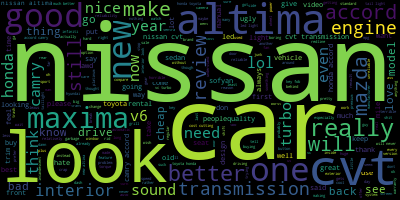

In [88]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df_altima['commentText_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="black", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

For performing LDA the text present in the documents need to be vectorized. In the next step we will vectorize the text and then plot the 10 most common words in the document.

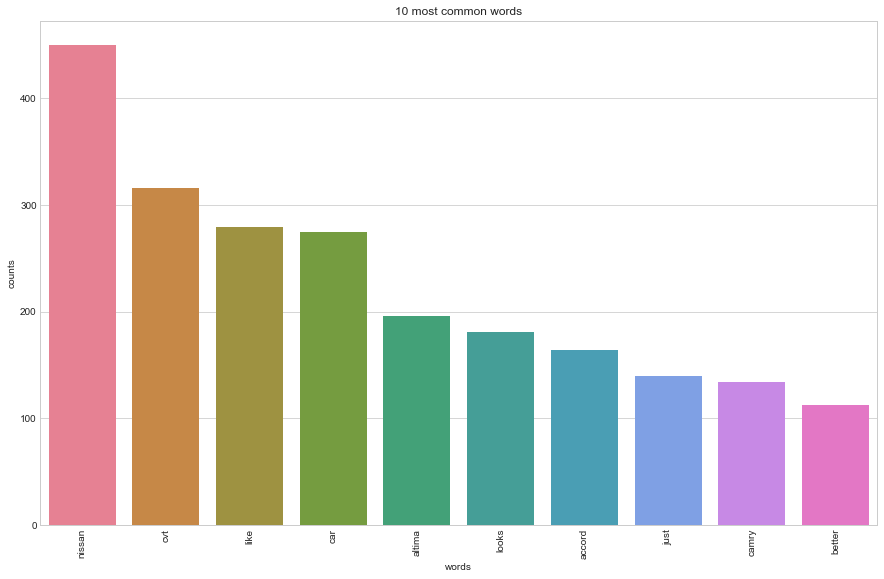

In [10]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df_altima['commentText_processed'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [47]:
# get all the comment text into one list which can be used for performing next steps
text_list = list(df_altima['commentText_processed'])

# Preprocessing - Create Term Frequency Matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

EXTRA_STOP_WORDS = ["nissan", "car", "altima", "like", "new"]
EXTRA_STOP_WORDS_2 = ["nissan", "car", "altima", "like", "new", "don", "really", "just"]
stopwords = ENGLISH_STOP_WORDS.union(EXTRA_STOP_WORDS)

# LDA can only use raw term counts for LDA
# initially we 
tf_vectorizer = CountVectorizer(max_df=0.90, \
                min_df=50, stop_words=stopwords)
tf = tf_vectorizer.fit_transform(text_list)

# each feature is a word (bag of words)
# get_feature_names() gives all words
tf_feature_names = tf_vectorizer.get_feature_names()

print(tf_feature_names[0:10])
print(tf.shape)

# split dataset into train (90%) and test sets (10%)
# the test sets will be used to evaluate proplexity of topic modeling
X_train, X_test = train_test_split(\
                tf, test_size=0.1, random_state=0)

['accord', 'better', 'camry', 'cars', 'cvt', 'don', 'engine', 'good', 'great', 'honda']
(1444, 25)


In [72]:
X_train

<1299x25 sparse matrix of type '<class 'numpy.int64'>'
	with 1959 stored elements in Compressed Sparse Row format>

In [48]:
# Train LDA model
from sklearn.decomposition import LatentDirichletAllocation

num_topics = 2

# Run LDA. For details, check
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html#sklearn.decomposition.LatentDirichletAllocation.perplexity

# max_iter control the number of iterations 
# evaluate_every determines how often the perplexity is calculated
# n_jobs is the number of parallel threads
lda = LatentDirichletAllocation(n_components=num_topics, \
                                max_iter=20,verbose=1,
                                evaluate_every=1, n_jobs=1,
                                random_state=0).fit(X_train)

C:\Users\Gaurav\Anaconda3_New\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


iteration: 1 of max_iter: 20, perplexity: 24.2046
iteration: 2 of max_iter: 20, perplexity: 23.8415
iteration: 3 of max_iter: 20, perplexity: 23.6833
iteration: 4 of max_iter: 20, perplexity: 23.5919


In [49]:
# Check topic and word distribution per topic

num_top_words=20

# lda.components_ returns a KxN matrix
# for word distribution in each topic.
# Each row consists of 
# probability (counts) of each word in the feature space

for topic_idx, topic in enumerate(lda.components_):
    print ("Topic %d:" % (topic_idx))
    # print out top 20 words per topic 
    words=[(tf_feature_names[i],topic[i]) \
           for i in topic.argsort()[::-1][0:num_top_words]]
    print(words)
    print("\n")

Topic 0:
[('accord', 150.46174239354082), ('looks', 140.18074112108235), ('camry', 117.08967026888918), ('honda', 110.60599584295667), ('better', 99.67495645948473), ('just', 99.14608153518408), ('maxima', 75.7941430614925), ('toyota', 71.72565401126509), ('mazda', 60.70948248572436), ('interior', 59.82379444365823), ('review', 51.884240812368745), ('lol', 48.7520651709061), ('good', 41.47870486880616), ('nice', 36.42289333973743), ('great', 21.07386801015889), ('really', 18.90307643964375), ('look', 15.954195427127402), ('don', 8.07444847411146), ('cars', 5.430571451690364), ('turbo', 4.326792116782781)]


Topic 1:
[('cvt', 284.7750125003507), ('engine', 110.12692088753745), ('transmission', 91.13622707135748), ('turbo', 72.13865513082884), ('lights', 66.88196996443536), ('cars', 66.44475866707477), ('don', 63.25746211229304), ('led', 59.66006628230805), ('look', 58.0895369228003), ('great', 47.6364590475779), ('really', 45.23906805059222), ('good', 35.62759562151209), ('review', 23.2

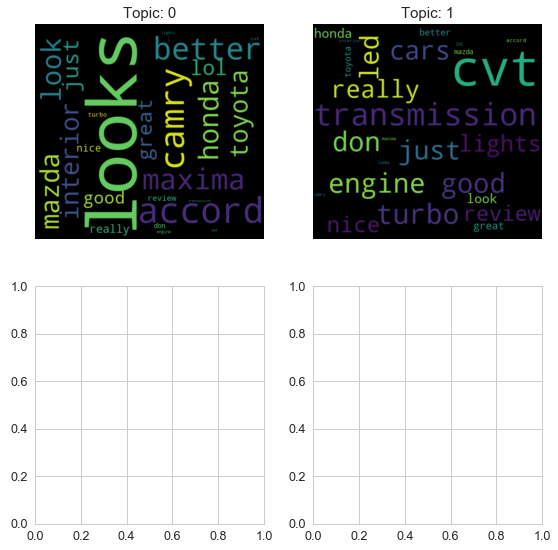

In [89]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import math

num_top_words=50
f, axarr = plt.subplots(2, 2, figsize=(8, 8));

for topic_idx, topic in enumerate(lda.components_):
    # create a dataframe with two columns (word, weight) for each topic
    
    # create a word:count dictionary
    f={tf_feature_names[i]:topic[i] for i in topic.argsort()[::-1][0:num_top_words]}
    
    # generate wordcloud in subplots
    wordcloud = WordCloud(width=480, height=450, margin=0, background_color="black");
    _ = wordcloud.generate_from_frequencies(frequencies=f);
    
    _ = axarr[math.floor(topic_idx/2), topic_idx%2].imshow(wordcloud, interpolation="bilinear");
    _ = axarr[math.floor(topic_idx/2), topic_idx%2].set_title("Topic: "+str(topic_idx));
    _ = axarr[math.floor(topic_idx/2), topic_idx%2].axis('off')

plt.tight_layout()
plt.show()

In [90]:
# Exercise 5.1.1 How to find the best number of topics?
# Vary variable num_topics, e.g. set it to 2, 3, 5, ...
# For each value, train LDA model, 
# calculate perplexity on the test data

import numpy as np
import matplotlib.pyplot as plt

result=[]
for num_topics in range(2,15):
    lda = LatentDirichletAllocation(n_components=num_topics, \
                                learning_method='online', \
                                max_iter=10,verbose=0, n_jobs=1,
                                random_state=0).fit(X_train)
    p=lda.perplexity(X_test)
    result.append([num_topics,p])
    print(num_topics, p)

2 34.65220837113266
3 34.973962781537466
4 37.48369409842904
5 42.01769081928311
6 45.35188262863763
7 46.024999995638396
8 49.81985335327002
9 48.005688187633375
10 53.0590084904315
11 49.73881543157166
12 54.91717557393587
13 50.877644890353466
14 58.27924854593074


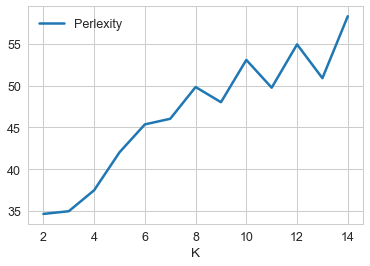

In [91]:
import pandas as pd
pd.DataFrame(result, columns=["K", "Perlexity"]).plot.line(x='K',y="Perlexity");
plt.show();

In [92]:
# 6.1. Create LDA model using the same TF matrix generated from sklearn

import gensim
from gensim import corpora

# A corpus is TF matrix in the list format, e.g.:
# [[(0, 1), (1,2), (4, 1), ...], [...], ...]
# which shows the first document has words with id=0,1,4
# and the count of word 0 is 1, word 1 is 2, ...

# convert the gensim corpus from the sparse tf matrix
corpus = gensim.matutils.Sparse2Corpus(X_train, documents_columns=False)

# create the mapping between id and words
id2word={idx:w for idx, w in enumerate(tf_vectorizer.get_feature_names())}

# create a gensim dictionary from the corpus
# a dictionary contains the frequency of each words 
# the mapping between ids and words
dictionary = corpora.Dictionary.from_corpus(corpus, id2word=id2word)

In [93]:
# 6.2. Train LDA model

NUM_TOPICS = 2

# for detailed parameters, check
#https://radimrehurek.com/gensim/models/ldamodel.html

ldamodel = gensim.models.ldamodel.LdaModel(corpus, alpha='auto', num_topics = NUM_TOPICS, \
                                           id2word=id2word, iterations=15)

topics = ldamodel.print_topics(num_words=20)
for topic in topics:
    print(topic)

(0, '0.105*"cvt" + 0.066*"accord" + 0.065*"honda" + 0.060*"camry" + 0.052*"engine" + 0.051*"just" + 0.047*"turbo" + 0.045*"looks" + 0.045*"really" + 0.044*"led" + 0.041*"don" + 0.037*"toyota" + 0.037*"good" + 0.037*"interior" + 0.037*"mazda" + 0.035*"cars" + 0.031*"transmission" + 0.029*"better" + 0.027*"lol" + 0.025*"lights"')
(1, '0.145*"cvt" + 0.091*"looks" + 0.069*"better" + 0.064*"accord" + 0.057*"just" + 0.053*"maxima" + 0.050*"look" + 0.046*"transmission" + 0.045*"camry" + 0.037*"good" + 0.035*"great" + 0.034*"lights" + 0.034*"cars" + 0.033*"review" + 0.027*"toyota" + 0.024*"honda" + 0.022*"mazda" + 0.021*"interior" + 0.019*"don" + 0.017*"lol"')


In [94]:
# 6.3. visualize topics

import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

C:\Users\Gaurav\Anaconda3_New\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [43]:
# Exercise 6.1. Use NLTK for Named Entity Recognition

from nltk import word_tokenize, pos_tag, ne_chunk
 
sentence = df_altima['commentText'][104] 

# the input to ne_chunk is list of (token, pos tag) tuples
ner_tree=ne_chunk(pos_tag(word_tokenize(sentence)))

# ne_chunk returns a tree
print(ner_tree)

# get PERSON out of the tree
person=[]
for t in ner_tree.subtrees():
    if t.label() == 'PERSON':
        person.append(t.leaves())
print("PERSON",person)

# how to extract organization?

(S
  (GPE Soyfan/NNP)
  ,/,
  (PERSON How/NNP)
  can/MD
  I/PRP
  get/VB
  a/DT
  hold/NN
  of/IN
  a/DT
  (GPE Honda/NNP)
  engineer/NN
  ?/.
  These/DT
  wankers/NNS
  forgot/VBD
  to/TO
  put/VB
  a/DT
  turbo/NN
  boost/NN
  gauge/NN
  in/IN
  the/DT
  2.0T/CD
  w/6MT/NN
  ./.
  I/PRP
  'm/VBP
  not/RB
  sure/JJ
  if/IN
  it/PRP
  was/VBD
  a/DT
  design/NN
  oversight/NN
  ,/,
  a/DT
  crazy/JJ
  night/NN
  of/IN
  cocaine/NN
  and/CC
  strippers/NNS
  or/CC
  just/RB
  laziness/VB
  ?/.
  How/NNP
  hard/JJ
  is/VBZ
  it/PRP
  to/TO
  configure/VB
  a/DT
  computer/NN
  with/IN
  1/CD
  's/POS
  and/CC
  0/CD
  's/POS
  to/TO
  indicate/VB
  that/IN
  when/WRB
  eco/JJ
  mode/NN
  is/VBZ
  off/RB
  ,/,
  sport/NN
  mode/NN
  is/VBZ
  on/IN
  by/IN
  default/NN
  and/CC
  the/DT
  fucking/NN
  turbo/NN
  boost/NN
  gauge/NN
  goes/VBZ
  up/RP
  on/IN
  the/DT
  tachometer/NN
  ?/.
  It/PRP
  works/VBZ
  on/IN
  automatic/JJ
  models/NNS
  with/IN
  a/DT
  sport/NN
  button/NN
  ?/.

In [39]:
df_altima['commentText_processed'][104]

"soyfan how can i get a hold of a honda engineer  these wankers forgot to put a turbo boost gauge in the 20t w/6mt i'm not sure if it was a design oversight a crazy night of cocaine and strippers or just laziness  how hard is it to configure a computer with 1's and 0's to indicate that when eco mode is off sport mode is on by default and the fucking turbo boost gauge goes up on the tachometer  it works on automatic models with a sport button  how hard is it to sends binary code to an ecm in the same fashion  fuck  #morons"

# Testing LDA accuracy

In order to calculate the accuracy of LDA we need a set of test data that is labeled. To do this, firstly we will again split the data into training and test sets, download both the training and test sets. Assign topics to the test set, upload it again and test the accuracy.

Downloading both the training and test sets is important as the split is random and we will get different training and test sets each time we do the split. Hence, if we do not store the datasets, we will have to label the test sets each and everytime.

In [108]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.cluster import KMeansClusterer, cosine_distance
from sklearn.decomposition import LatentDirichletAllocation

import gensim
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel

import pandas as pd
from sklearn import metrics
import numpy as np
import json, time
from matplotlib import pyplot as plt

In [109]:
# now we split the data from the accord dataset into train test splits and then we try to label the test data 
from sklearn.cross_validation import train_test_split
train_altima, test_altima = train_test_split(df_altima, test_size=0.1)

In [106]:
# exporting the train and test datasets to the system
# train_accord.to_csv("C://Gaurav//Study//Spring 2019 Poster Presentation//train_test_datasets//LDA//train_altima_redline_v1.csv")
# test_accord.to_csv("C://Gaurav//Study//Spring 2019 Poster Presentation//train_test_datasets//LDA//test_altima_redline_v1.csv")

In [114]:
# now importing the labelled test set and the train set
test_labelled = pd.read_csv("C://Gaurav//Study//Spring 2019 Poster Presentation//train_test_datasets//LDA//test_altima_redline_v1.csv")
train = pd.read_csv("C://Gaurav//Study//Spring 2019 Poster Presentation//train_test_datasets//LDA//train_altima_redline_v1.csv")

In [116]:
#first_label=[item[0] for item in all_label]
label = list(test_labelled["Topic"])

EXTRA_STOP_WORDS = ["nissan", "car", "altima", "like", "new"]
#EXTRA_STOP_WORDS_2 = ["nissan", "car", "altima", "like", "new", "don", "really", "just"]
stopwords = ENGLISH_STOP_WORDS.union(EXTRA_STOP_WORDS)

# LDA can only use raw term counts for LDA
# initially we 

# creating lists of train and test texts to be used further in the code
test_labelled = test_labelled.dropna(axis = 0)
train_list = list(train["commentText_processed"])
train_list_array = np.asarray(train_list)
test_text = list(test_labelled["commentText_processed"])
test_text_array = np.asarray(test_text)
train_test_list = train_list + test_text

tf_vectorizer = CountVectorizer(max_df=0.90, \
                min_df=50, stop_words=stopwords)
tf = tf_vectorizer.fit_transform(train_test_list)



# tf_vectorizer = CountVectorizer(min_df=5, stop_words='english')
# tf = tf_vectorizer.fit_transform(train+list(test_text))
 
num_clusters=2

lda = LatentDirichletAllocation(n_components=num_clusters, \
                                max_iter=20,verbose=1,
                                evaluate_every=1, n_jobs=1,
                                random_state=0).fit(tf[0:len(train)])

# lda = LatentDirichletAllocation(n_components=num_clusters, learning_method='batch',\
#                                 max_iter=25,verbose=1, n_jobs=1,
#                                 random_state=0).fit(tf[0:len(train)])
    
topic_assign=lda.transform(tf[len(train):])
print(topic_assign[0:10])
clusters=topic_assign.argmax(axis=1)
print(clusters[0:10])

df=pd.DataFrame(list(zip(label, clusters)), \
                columns=['actual_class','cluster'])

# df=pd.DataFrame(list(zip(first_label, clusters)), \
#                 columns =['actual_class','cluster'])

confusion = pd.crosstab( index=df.cluster, columns=df.actual_class)
print(confusion.head())
mapping = confusion.idxmax(axis=1)
for idx, t in enumerate(mapping):
    print("Cluster {}: Topic {}".format(idx, t))
    
predicted_target=[mapping[i] for i in clusters]

print(metrics.classification_report(label, predicted_target))



C:\Users\Gaurav\Anaconda3_New\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


iteration: 1 of max_iter: 20, perplexity: 24.1563
iteration: 2 of max_iter: 20, perplexity: 23.7282
iteration: 3 of max_iter: 20, perplexity: 23.5350
iteration: 4 of max_iter: 20, perplexity: 23.4215
iteration: 5 of max_iter: 20, perplexity: 23.3481
[[0.87136743 0.12863257]
 [0.25035959 0.74964041]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.87308371 0.12691629]
 [0.33797269 0.66202731]
 [0.4091328  0.5908672 ]
 [0.37060044 0.62939956]
 [0.25071887 0.74928113]
 [0.66369608 0.33630392]]
[0 1 0 0 0 1 1 1 1 0]
actual_class  CVT/Lights  Competitors
cluster                              
0                     36           51
1                     46            8
Cluster 0: Topic Competitors
Cluster 1: Topic CVT/Lights
             precision    recall  f1-score   support

 CVT/Lights       0.85      0.56      0.68        82
Competitors       0.59      0.86      0.70        59

avg / total       0.74      0.69      0.69       141



In [85]:
df

,actual_class,cluster
0,T1,1
1,T2,0
2,T2,0
3,T2,1
4,T1,0
5,T2,0
6,T2,0
7,T2,1
8,T2,0
9,T1,0


In [58]:
type(train_list)

list

In [61]:
train_list+test_text

['after what happen with my 2016 sentra i am never buying another nissan as long as they still continue to put on their shitty cvt transmissions i had to have the transmission replaced at 50000 miles nissan quality has really gone downhill no wonder they some weight cheaper than toyota or honda even the mazda3 i currently own drives better',
 'why all crying out about nissan ',
 'as a 2018 sl altima owner i am disgusted at that interior the head unit i just looks out of place and the hvac controls look like an after thought and something out of a 50s ford galaxy',
 "man i definitely don't like a cvt also a 4 cylinder engine should get 40mpg",
 'the best sport sedan ever',
 'god i fucking hate nissan',
 'did you use a new camera looks very good',
 'nissan with cvt = crap',
 'never been a big nissan fan but have to say i like the exterior on this and they are using my favorite gauge layout big analog tak and speedo with a lcd screen in the middle',
 'white roof liner  fucking die on a li

In [65]:
type(train["commentText_processed"].values.astype('U'))

numpy.ndarray

In [87]:
df_altima.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1444 entries, 0 to 2345
Data columns (total 2 columns):
commentText              1444 non-null object
commentText_processed    1444 non-null object
dtypes: object(2)
memory usage: 33.8+ KB


In [111]:
tf

<1443x25 sparse matrix of type '<class 'numpy.int64'>'
	with 2187 stored elements in Compressed Sparse Row format>

In [112]:
df

,actual_class,cluster
0,Competitors,0
1,CVT/Lights,1
2,CVT/Lights,0
3,CVT/Lights,0
4,Competitors,0
5,CVT/Lights,1
6,CVT/Lights,1
7,CVT/Lights,1
8,CVT/Lights,1
9,Competitors,0


In [113]:
df.to_csv("C://Gaurav//Study//Spring 2019 Poster Presentation//train_test_datasets//LDA//labels.csv")